# Rede Neural Artificial no suporte ao diagnóstico de doenças cardiovasculares
---


Importando a biblioteca `pandas` e criando o nosso dataset

In [17]:
import pandas as pd

Importando o banco de dados `heart.csv`

In [18]:
# Criando o dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/franklinthony/dataset/master/heart.csv', sep = ',')

Descrevendo o dataset 

|                Coluna                | Descrição |
|:------------------------------------:|:---------:|
|                  age                 |    Idade (em anos)       |
|                  sex                 |       Sexo (0 - feminino; 1 - masculino)    |
|            chest pain type (cp)      |    Tipo de dor no peito (0 a 4)       |
|           resting blood pressure (trestbps)   |  Pressão arterial em repouso         |
| serum cholestoral in mg/dl (chol)    |     Colesterol (em mg/dL)      |
|          fasting blood sugar (fps)   |    Açúcar no sangue em jejum - 120 mg/dL (0 - falso; 1 - verdadeiro)       |
| resting electrocardiographic results (restcg) |    Resultados eletrocardiográficos em repouso       |
|      maximum heart rate achieved (thalach)   |      Frequência cardíaca máxima    |
|        exercise induced angina (exang)       |    Estreitamento das artérias durante atividade física (0 - não; 1 - sim)       |
|                oldpeak               |       Depressão de ST induzida por exercício em relação ao repouso    |
|    the slope of the peak exercise (slope)  |      Inclinação do segmento ST de pico do exercício     |
|        number of major vessels (ca)   |     Número de vasos principais (0 a 3)      |
|                 thal                 |   3 - normal; 6 - defeito corrigido; 7 - defeito reversível     |
| target |  0 - sem problemas cardiovasculares; 1 - com problemas cardiovasculares  |

In [19]:
# Visualizando o dataset
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
# Tratando valores nulos
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Importando a função `train_test_split` para realizarmos a subdivisão do dataset entre treinamento e teste

In [21]:
from sklearn.model_selection import train_test_split

Criando as variáveis que irão receber os atributos previsores e a classe

In [22]:
previsores = dataset.iloc[:, 0:13].values
classe = dataset.iloc[:, 13].values

Realizando a subdivisão do dataset entre treinamento e teste. O `test_size = 0.25` indica que 25% dos dados corresponderão à base de dados de teste, ou seja, 75% de todo o dataset será para treinamento da nossa rede neural

In [23]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size = 0.25)

Importando a biblioteca `keras` para aplicações envolvendo redes neurais profundas

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Criando a nossa rede neural

In [25]:
# 'Sequential()' significa que a rede será totalmente conectada
model = Sequential()
# Criando a camada de entrada e a primeira camada oculta/densa
model.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 13))
# Mais uma camada oculta/densa
model.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'random_uniform'))
# Criando a camada de saída
model.add(Dense(units = 1, activation = 'sigmoid'))

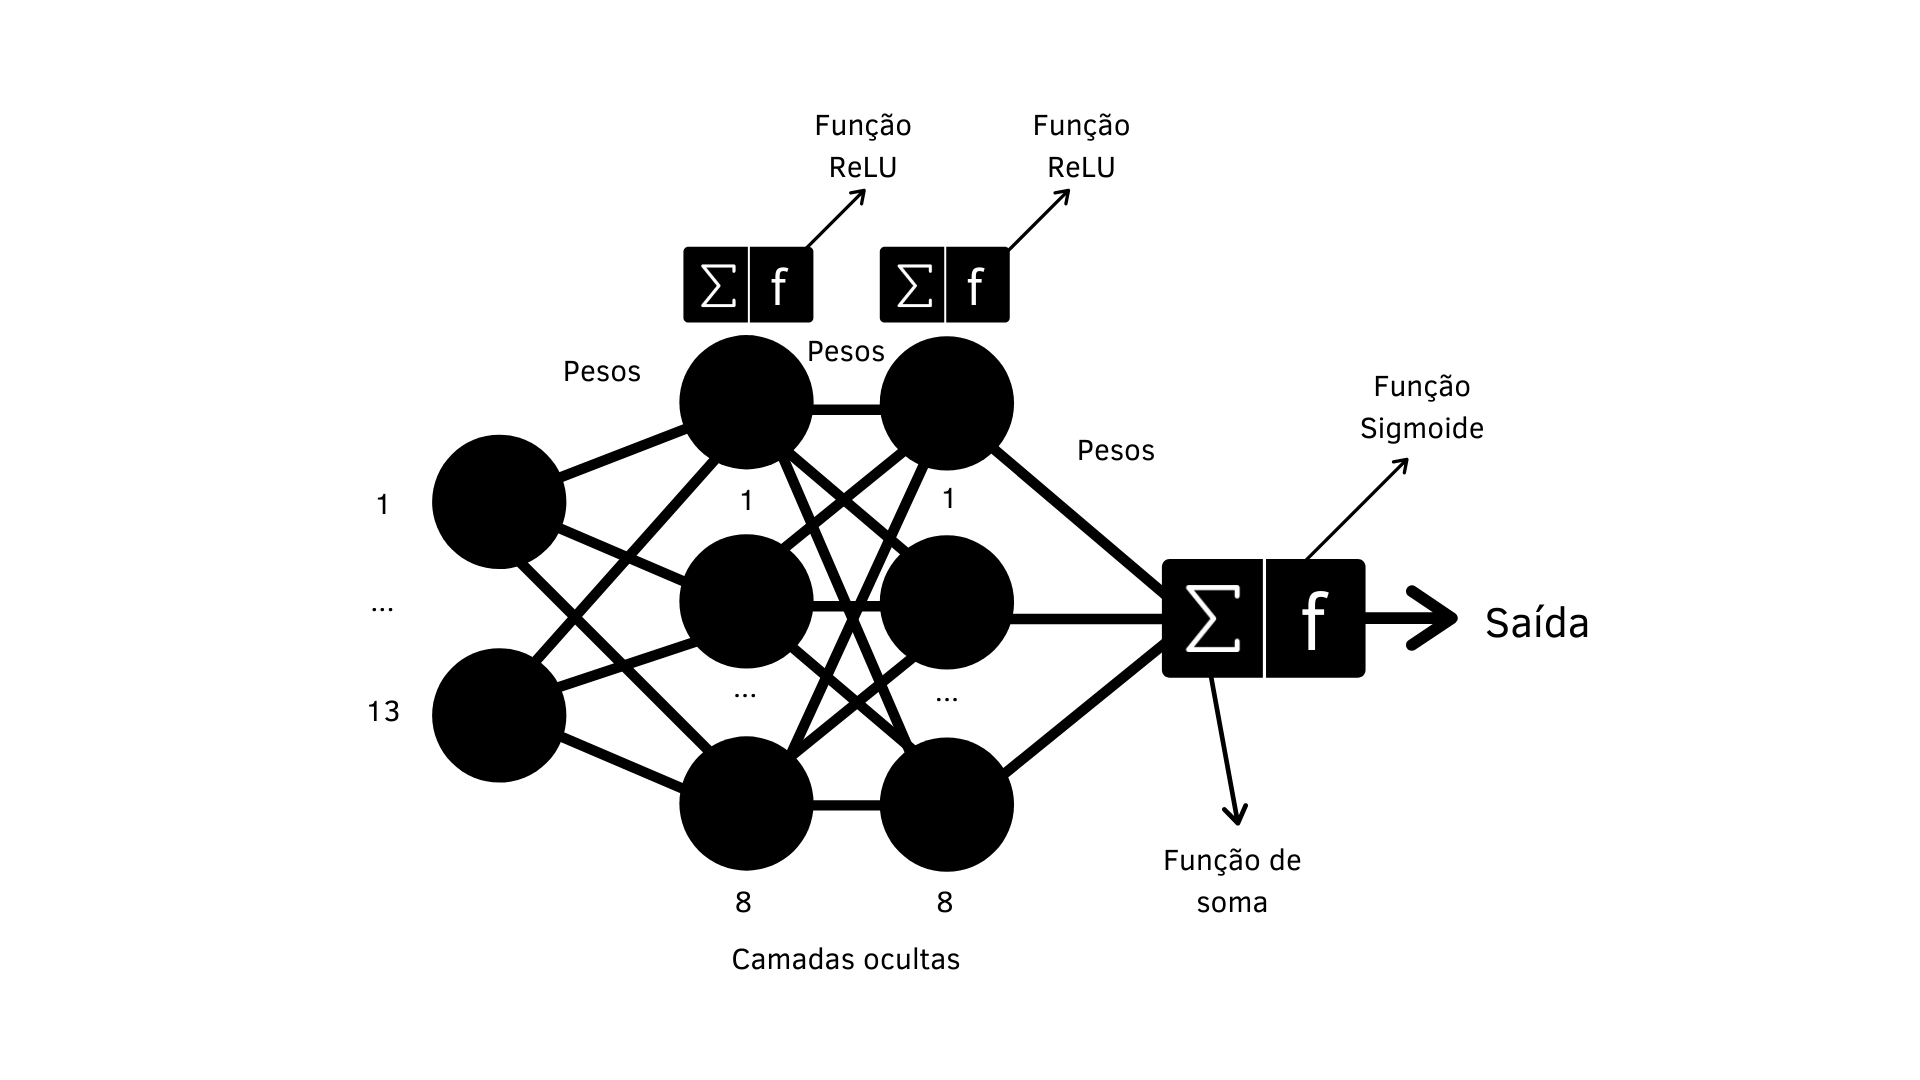

In [26]:
# Compilando o modelo
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [27]:
# Treinamento do modelo
model.fit(previsores_treinamento, classe_treinamento, batch_size = 50, epochs = 500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6962 - binary_accuracy: 0.5374
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6883 - binary_accuracy: 0.5551
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6859 - binary_accuracy: 0.5507
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6854 - binary_accuracy: 0.5507
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6825 - binary_accuracy: 0.5507
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6827 - binary_accuracy: 0.5507
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6776 - binary_accuracy: 0.5551
Epoch 8/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6747 - binary_accuracy: 0.5507
Epoch 9/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6725 - binary_accuracy: 0.5507
Epoch 10/500
5/5 [==============================] - 0s 1ms/step 

In [30]:
# Visualizando os pesos entre as camadas
pesos = model.layers[0].get_weights()
pesos

[array([[-0.02157836,  0.0024056 ,  0.00604095, -0.00215505, -0.00821324,
          0.06115719, -0.01775025,  0.0692767 ],
        [ 0.01842202, -0.8910829 , -0.76725006,  0.03330428, -0.77869904,
         -0.81949   ,  0.02745223,  0.69699347],
        [-0.00943412,  0.40637022,  0.54053414, -0.00628068,  0.6433346 ,
          0.56288445, -0.01061447, -0.5148528 ],
        [-0.02660693,  0.01966362, -0.0384967 ,  0.0288269 ,  0.05008361,
         -0.0361105 ,  0.03982718,  0.08403765],
        [-0.04850925,  0.00901129,  0.03607363, -0.02970959, -0.0189352 ,
          0.01349736, -0.04193456,  0.07766937],
        [ 0.02393718,  0.06813786,  0.21192406, -0.03225064,  0.22574387,
          0.253409  ,  0.04874843, -0.1536949 ],
        [ 0.03476876,  0.07988603,  0.42540962, -0.04511298,  0.4030594 ,
          0.39129776, -0.04547603, -0.3473112 ],
        [-0.00457907, -0.01020389,  0.02167551, -0.00730823,  0.03293279,
          0.02301517, -0.00183226,  0.02353563],
        [-0.0338

In [31]:
# Realizando a predição do modelo
previsoes = model.predict(previsores_teste)
previsoes = (previsoes > 0.5)
previsoes

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

In [32]:
classe_t = (classe_teste > 0.5) 
classe_t

array([ True, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False,  True, False, False,  True, False, False,
        True,  True,  True, False])

Importando as funções `confusion_matrix` e `accuracy_score` para visualizarmos os resultados provenientes do modelo

In [33]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

In [35]:
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
precisao

0.868421052631579

Importando as bibliotecas `seaborn` e `matplotlib` para uma visualização melhorada da matriz de confusão

In [36]:
import seaborn as sn
import matplotlib.pyplot as plt

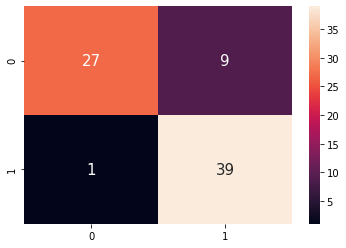

In [37]:
df = pd.DataFrame(matriz, range(2), range(2))
sn.heatmap(df, annot=True, annot_kws={"size": 15})

Obtendo a acurácia do nosso modelo na base de teste


In [38]:
resultado = model.evaluate(previsores_teste, classe_teste)

3/3 [==============================] - 0s 2ms/step - loss: 0.3870 - binary_accuracy: 0.8684
